<a href="https://colab.research.google.com/github/Kunwar-Bhattal/Fruits-and-Vegetable-Recognition/blob/main/ImageRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Data from Kaggle**

In [20]:
# !kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

In [2]:
'''
import zipfile

# Specify the path to your downloaded ZIP file
zip_file_path = '/content/fruit-and-vegetable-image-recognition.zip'

# Specify the directory where you want to extract the contents
extracted_dir = '/content'

# Extract the contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

print(f"Contents extracted to {extracted_dir}")
'''

'\nimport zipfile\n\n# Specify the path to your downloaded ZIP file\nzip_file_path = \'/content/fruit-and-vegetable-image-recognition.zip\'\n\n# Specify the directory where you want to extract the contents\nextracted_dir = \'/content\'\n\n# Extract the contents\nwith zipfile.ZipFile(zip_file_path, \'r\') as zip_ref:\n    zip_ref.extractall(extracted_dir)\n\nprint(f"Contents extracted to {extracted_dir}")\n'

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

## **Importing Libraries**

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# import sklearn as sns

## **Data Preprocessing**

In [5]:
training_data = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/ML_Data/FruitVegetablesData/train',
    labels = "inferred",
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
    )

Found 3115 files belonging to 36 classes.


## **Validating Image Preprocessing**

In [6]:
validation_data = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/ML_Data/FruitVegetablesData/validation',
    labels = "inferred",
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
    )

Found 351 files belonging to 36 classes.


## **Building Model**

In [7]:
cnn = tf.keras.models.Sequential()
# Convolution Layer:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[64,64,3]))
# Pooling Layer:  ()
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
# Redoing the above to add more Layers
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128,activation = 'relu'))
# Output(final) Layer:
cnn.add(tf.keras.layers.Dense(units=36,activation ='softmax' ))

## **Compiling & Training**

In [9]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
training_history = cnn.fit(x=training_data, validation_data=validation_data,epochs=30) # epochs were set to 30 but took too long.

Epoch 1/30
98/98 [==============================] - 108s 1s/step - loss: 10.4565 - accuracy: 0.0376 - val_loss: 3.4409 - val_accuracy: 0.1054
Epoch 2/30
98/98 [==============================] - 117s 1s/step - loss: 4.1286 - accuracy: 0.0639 - val_loss: 3.2908 - val_accuracy: 0.1738
Epoch 3/30
98/98 [==============================] - 107s 1s/step - loss: 3.7444 - accuracy: 0.0947 - val_loss: 14.8656 - val_accuracy: 0.0399
Epoch 4/30
98/98 [==============================] - 107s 1s/step - loss: 3.7821 - accuracy: 0.1339 - val_loss: 2.9299 - val_accuracy: 0.2222
Epoch 5/30
98/98 [==============================] - 108s 1s/step - loss: 3.9135 - accuracy: 0.1724 - val_loss: 2.9468 - val_accuracy: 0.2393
Epoch 6/30
98/98 [==============================] - 108s 1s/step - loss: 3.3931 - accuracy: 0.2138 - val_loss: 2.5552 - val_accuracy: 0.4131
Epoch 7/30
98/98 [==============================] - 108s 1s/step - loss: 3.1451 - accuracy: 0.2754 - val_loss: 2.4049 - val_accuracy: 0.4217
Epoch 8/30


In [11]:
cnn.save('/content/drive/MyDrive/ML_Models/FruitVegetables/trained_model_ImageRecognition.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **Saving in Json File**

In [12]:
training_history.history

{'loss': [10.456496238708496,
  4.128554344177246,
  3.7443747520446777,
  3.7821223735809326,
  3.9134957790374756,
  3.393052816390991,
  3.1451213359832764,
  2.8795151710510254,
  2.8854801654815674,
  2.4840774536132812,
  2.3821234703063965,
  2.5378010272979736,
  2.6469500064849854,
  2.0173091888427734,
  2.1220736503601074,
  1.8310316801071167,
  1.6482888460159302,
  1.5683279037475586,
  1.4525437355041504,
  1.3985435962677002,
  1.3761565685272217,
  1.385840892791748,
  1.2380021810531616,
  1.109537959098816,
  1.1906331777572632,
  1.2525626420974731,
  1.2211501598358154,
  1.3414509296417236,
  1.1671580076217651,
  1.253836989402771],
 'accuracy': [0.03756019100546837,
  0.0638844296336174,
  0.09470304846763611,
  0.13386838138103485,
  0.17239165306091309,
  0.21380417048931122,
  0.27544140815734863,
  0.30176565051078796,
  0.33130016922950745,
  0.3833065927028656,
  0.41540929675102234,
  0.44622793793678284,
  0.49277690052986145,
  0.520385205745697,
  0.55

In [13]:
import json
with open('/content/drive/MyDrive/ML_Models/FruitVegetables/training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [14]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## **Calculating Accuracy of model**

In [15]:
print("Validation set Accuracy: ", training_history.history['val_accuracy'][-1])

Validation set Accuracy:  0.8860399127006531


## **Visualising Training Stats:**

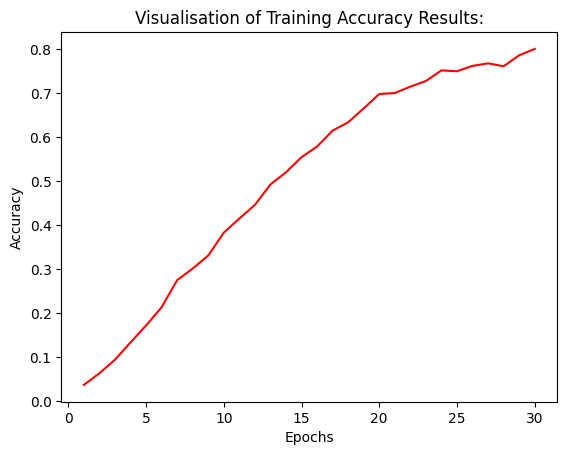

In [18]:
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color= 'red')
plt.title("Visualisation of Training Accuracy Results:")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

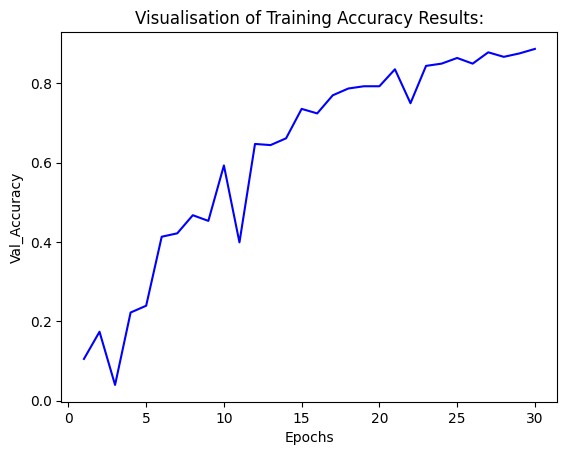

In [19]:
plt.plot(epochs,training_history.history['val_accuracy'],color= 'blue')
plt.title("Visualisation of Training Accuracy Results:")
plt.xlabel("Epochs")
plt.ylabel("Val_Accuracy")
plt.show()